In [1]:
# Data Load 
import pandas as pd
import os
processed_files_path = 'processed_data/'
processed_files = os.listdir(processed_files_path)

commits_df = pd.read_csv (processed_files_path+processed_files[0])

In [2]:
commits_df = commits_df.loc[:, (commits_df != 0).any(axis=0)]

print(commits_df)

     DIFF_ND  DIFF_NF   DIFF_EN  SIZE_LA  SIZE_LD  PURP_FIX  SKIP_DOC  \
0          1        1  0.000000        7        0         0         1   
1          0        1  0.000000        3        0         0         1   
2          0        1  0.000000        5        0         0         1   
3          2        2  0.345679       24       12         1         1   
4          0        1  0.000000        1        1         0         1   
..       ...      ...       ...      ...      ...       ...       ...   
141       14       44  0.737418      178       63         0         1   
142        1        6  0.696759        4       68         0         1   
143       30      177  0.979887    25255        1         0         1   
144        0        1  0.000000        1        0         0         1   
145        0        1  0.000000      202        0         0         1   

     SKIP_FRM  SKIP_BLD  LABEL  CM_add  CM_cn  CM_doc    CM_fix  CM_merge  \
0           0         0      0     0.0    0.0 

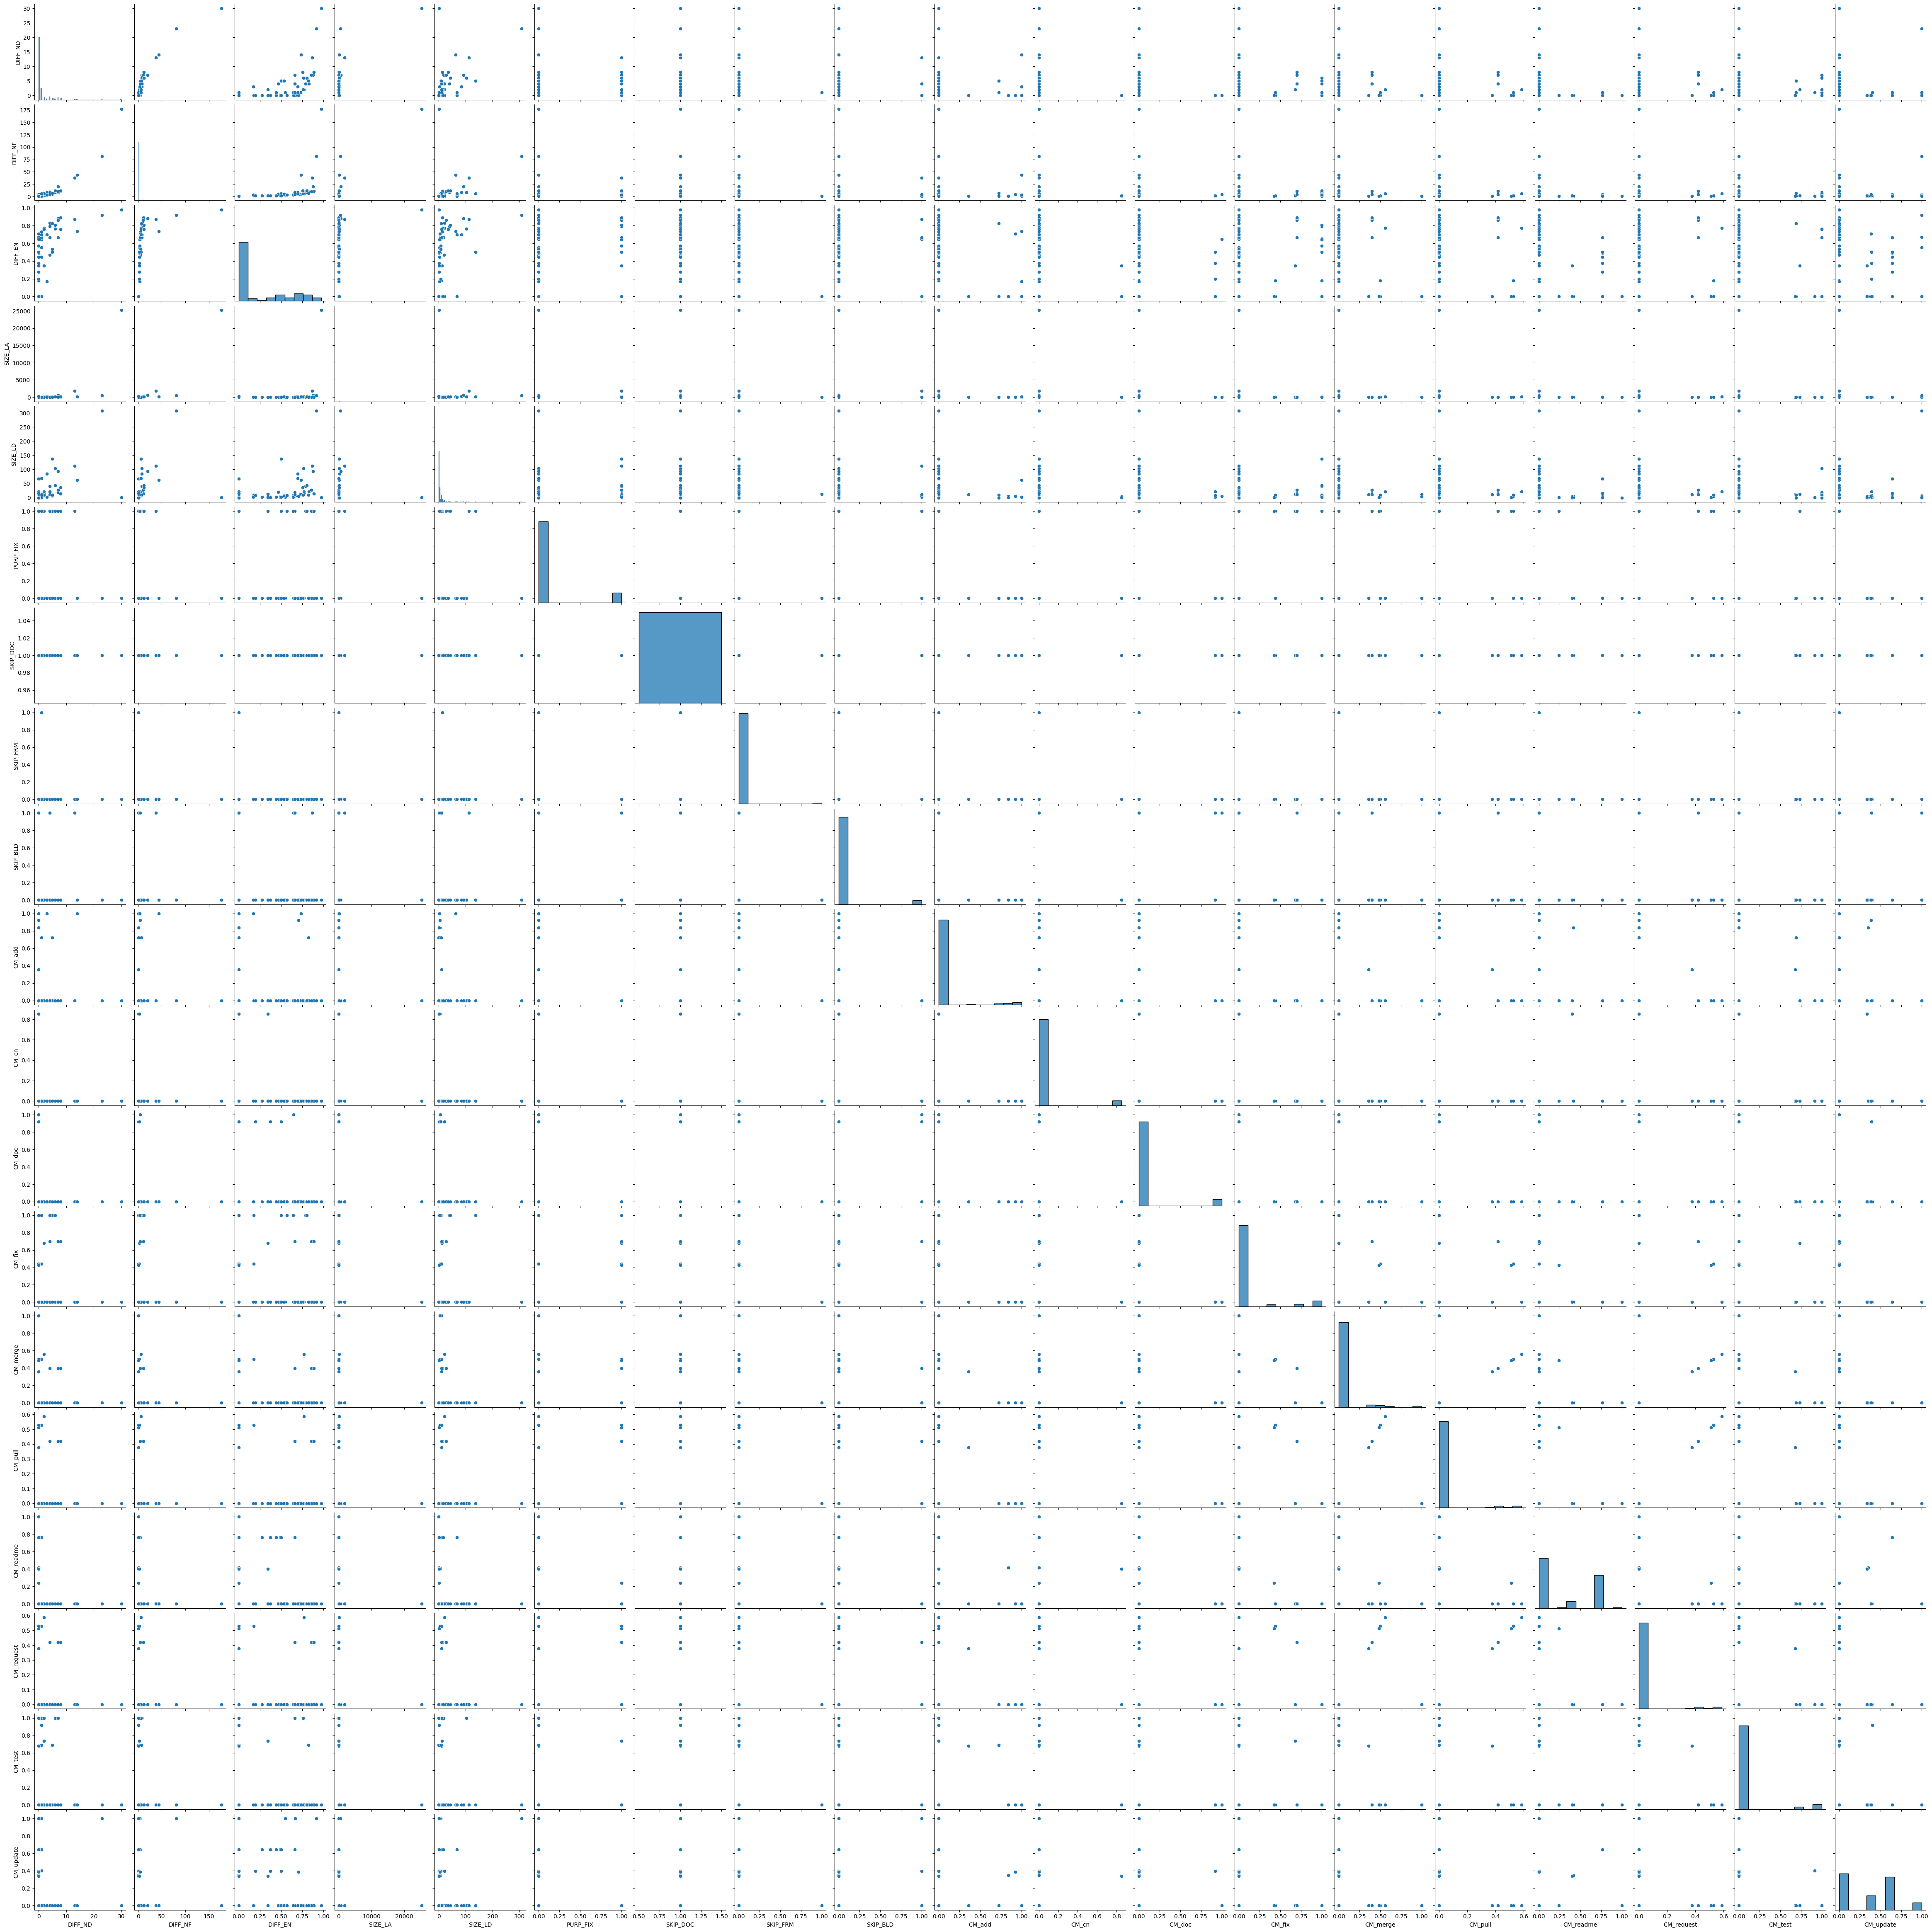

In [3]:
import seaborn
seaborn.pairplot(commits_df.drop('LABEL', axis = 1))

In [4]:
from sklearn.model_selection import train_test_split
X = commits_df.drop(['LABEL'], axis = 1)
y = commits_df['LABEL']
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .25, random_state = 42)

In [5]:
from sklearn.preprocessing import StandardScaler
# Normalize the data
sc = StandardScaler()
normed_train_data = pd.DataFrame(sc.fit_transform(training), columns = X.columns)
normed_test_data = pd.DataFrame(sc.fit_transform(testing), columns = X.columns)

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score,roc_auc_score,precision_score,recall_score,balanced_accuracy_score

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear"),
    SVC(),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


In [7]:
classifiers_perf = []
for clf in classifiers:
    
    clf.fit(training, training_labels)
    preds = clf.predict(testing)
    
    print(clf)
    print(classification_report(testing_labels,preds))
    print(confusion_matrix(testing_labels, preds))
    classifiers_perf.append({
        "classifier":clf,
        "accuracy_score":accuracy_score(testing_labels,preds),
        "balanced_accuracy_score":balanced_accuracy_score(testing_labels,preds),
        "f1_score":f1_score(testing_labels,preds),
        "roc_auc_score":roc_auc_score(testing_labels,preds),
        "precision_score":precision_score(testing_labels,preds),
        "recall_score":recall_score(testing_labels,preds),
        })

KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        21
           1       0.76      0.81      0.79        16

    accuracy                           0.81        37
   macro avg       0.81      0.81      0.81        37
weighted avg       0.81      0.81      0.81        37

[[17  4]
 [ 3 13]]
SVC(kernel='linear')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        16

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37

[[21  0]
 [ 0 16]]
SVC()
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.43      1.00      0.60        16

    accuracy                           0.43        37
   macro avg       0.22    

c:\Users\debon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\debon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\debon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

AdaBoostClassifier()
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.88      0.93        16

    accuracy                           0.95        37
   macro avg       0.96      0.94      0.94        37
weighted avg       0.95      0.95      0.95        37

[[21  0]
 [ 2 14]]
GaussianNB()
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.94      0.94      0.94        16

    accuracy                           0.95        37
   macro avg       0.94      0.94      0.94        37
weighted avg       0.95      0.95      0.95        37

[[20  1]
 [ 1 15]]
QuadraticDiscriminantAnalysis()
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.43      1.00      0.60        16

    accuracy                           0.43        37
   macro avg       0.22 

c:\Users\debon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\debon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:912: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\debon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:912: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\debon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:915: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
c:\Users\debon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and bein

In [8]:
pd.DataFrame(classifiers_perf)

,classifier,accuracy_score,balanced_accuracy_score,f1_score,roc_auc_score,precision_score,recall_score
0,KNeighborsClassifier(n_neighbors=3),0.810811,0.811012,0.787879,0.811012,0.764706,0.8125
1,SVC(kernel='linear'),1.000000,1.000000,1.000000,1.000000,1.000000,1.0000
2,SVC(),0.432432,0.500000,0.603774,0.500000,0.432432,1.0000
3,GaussianProcessClassifier(),0.729730,0.739583,0.722222,0.739583,0.650000,0.8125
4,DecisionTreeClassifier(),0.945946,0.937500,0.933333,0.937500,1.000000,0.8750
5,"(DecisionTreeClassifier(max_features='sqrt', r...",0.972973,0.968750,0.967742,0.968750,1.000000,0.9375
6,MLPClassifier(),0.702703,0.656250,0.476190,0.656250,1.000000,0.3125
7,"(DecisionTreeClassifier(max_depth=1, random_st...",0.945946,0.937500,0.933333,0.937500,1.000000,0.8750
8,GaussianNB(),0.945946,0.944940,0.937500,0.944940,0.937500,0.9375
9,QuadraticDiscriminantAnalysis(),0.432432,0.500000,0.603774,0.500000,0.432432,1.0000


In [9]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(training, training_labels)

RandomForestClassifier()

In [10]:
print(clf.__str__())

RandomForestClassifier()


In [11]:
preds = clf.predict(testing)

In [12]:
print (clf.score(training, training_labels))
print(clf.score(testing, testing_labels))


0.9724770642201835
0.972972972972973


In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

print(accuracy_score(testing_labels,preds))
print(classification_report(testing_labels,preds))
print(confusion_matrix(testing_labels, preds))

0.972972972972973
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.94      0.97        16

    accuracy                           0.97        37
   macro avg       0.98      0.97      0.97        37
weighted avg       0.97      0.97      0.97        37

[[21  0]
 [ 1 15]]


In [16]:
clf.feature_importances_

array([7.92006202e-02, 5.35053550e-02, 6.37415632e-02, 7.31581560e-02,
       4.08803341e-02, 1.09649019e-02, 0.00000000e+00, 9.15819244e-04,
       4.51745341e-03, 4.73713679e-03, 5.09767166e-03, 7.97387102e-02,
       1.27718959e-02, 8.53240997e-03, 1.25303021e-05, 3.02997483e-01,
       1.13234649e-03, 6.42084916e-03, 2.51674764e-01])

In [14]:
pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False)

,0
CM_readme,0.302997
CM_update,0.251675
CM_doc,0.079739
DIFF_ND,0.079201
SIZE_LA,0.073158
DIFF_EN,0.063742
DIFF_NF,0.053505
SIZE_LD,0.040880
CM_fix,0.012772
PURP_FIX,0.010965


In [15]:
 clf.feature_importances_

array([7.92006202e-02, 5.35053550e-02, 6.37415632e-02, 7.31581560e-02,
       4.08803341e-02, 1.09649019e-02, 0.00000000e+00, 9.15819244e-04,
       4.51745341e-03, 4.73713679e-03, 5.09767166e-03, 7.97387102e-02,
       1.27718959e-02, 8.53240997e-03, 1.25303021e-05, 3.02997483e-01,
       1.13234649e-03, 6.42084916e-03, 2.51674764e-01])